In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Cargar datos
df = pd.read_csv("C:/DATA/winequality-red.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

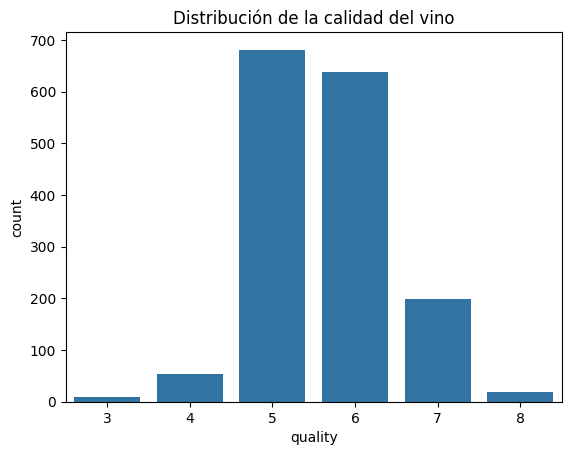

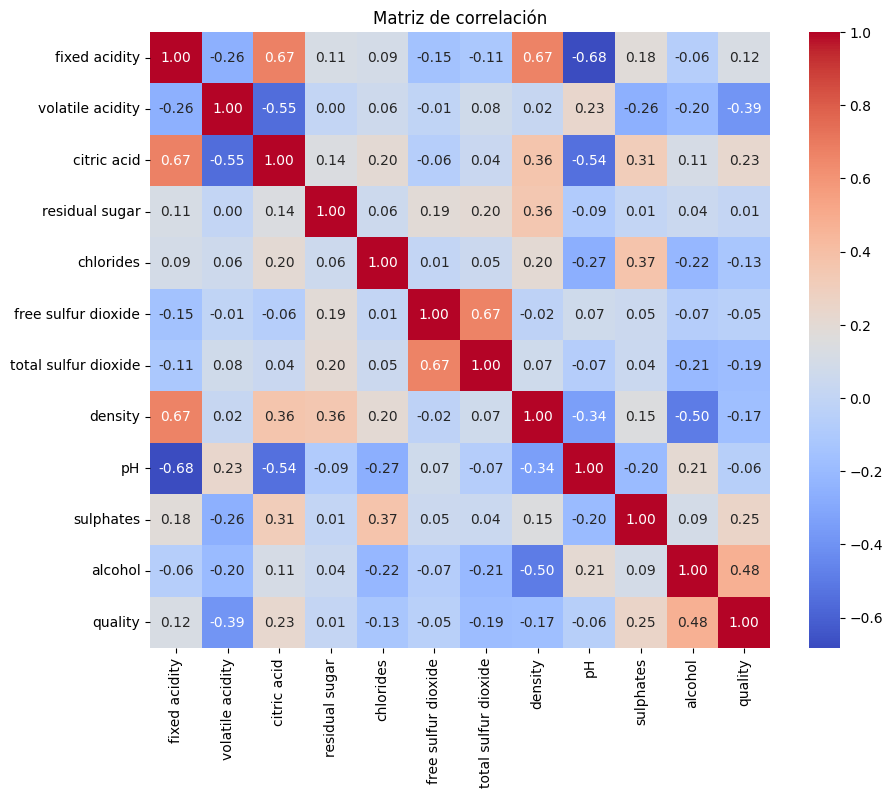

In [4]:
# Información general del dataset
print(df.info())
print(df.describe())

# Ver primeras filas
df.head()

# Visualización de la distribución de la variable objetivo
sns.countplot(data=df, x='quality')
plt.title('Distribución de la calidad del vino')
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [5]:
# Verificar valores nulos
print(df.isnull().sum())

# Si hubiese valores nulos, podrías usar:
# df = df.dropna() # Para eliminarlos
# df = df.fillna(df.mean()) # O para rellenarlos con el promedio


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.columns[:-1]  # todas menos la última columna (quality)
df[features] = scaler.fit_transform(df[features])

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


                 Feature       Score
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639
5    free sulfur dioxide    4.754233
8                     pH    4.341764
3         residual sugar    1.053374


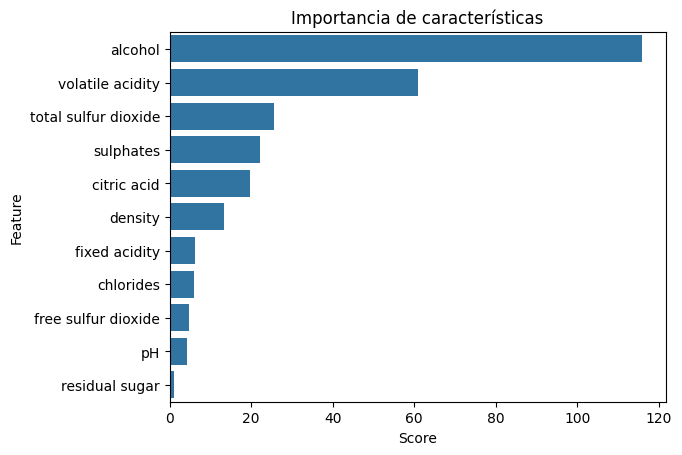

In [6]:
X = df.drop("quality", axis=1)  # Variables independientes
y = df["quality"]  # Variable dependiente

# Selección de características
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)
scores = selector.scores_

# Visualización de las puntuaciones de cada característica
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": scores})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)
print(feature_scores)

sns.barplot(x="Score", y="Feature", data=feature_scores)
plt.title("Importancia de características")
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Crear y entrenar el modelo
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

Matriz de Confusión:
 [[  0   0   1   0   0   0]
 [  0   0   8   9   0   0]
 [  0   0 145  48   2   0]
 [  0   0  77 105  18   0]
 [  0   0   4  35  22   0]
 [  0   0   0   4   2   0]]

Informe de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.74      0.67       195
           6       0.52      0.53      0.52       200
           7       0.50      0.36      0.42        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.53      0.57      0.55       480



C:\Users\SISTEMAS_PERSONERIA\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SISTEMAS_PERSONERIA\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SISTEMAS_PERSONERIA\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

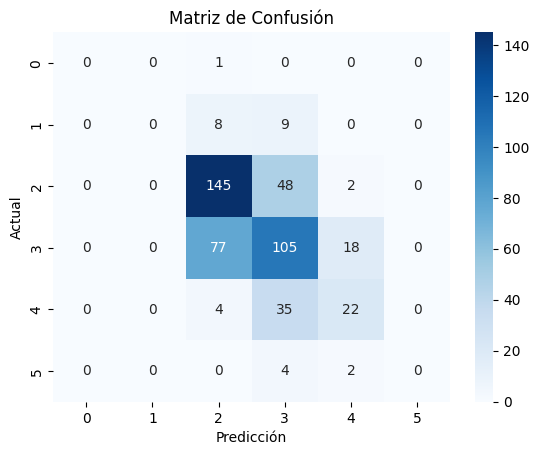

In [9]:
# Predicciones y métricas
y_pred = model.predict(X_test)

# Matriz de confusión y métricas
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

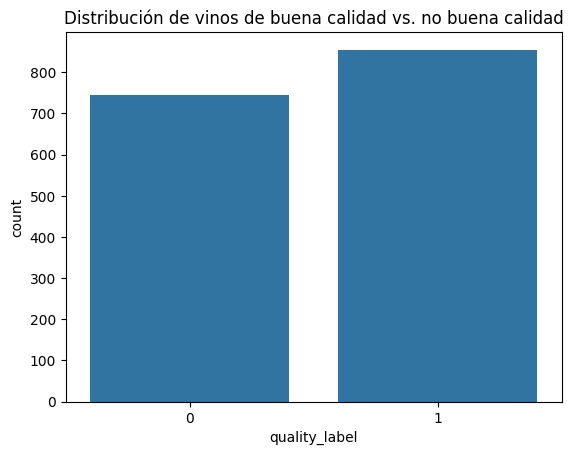

In [10]:
# Definir calidad binaria: 1 si es de buena calidad (>=6), 0 en caso contrario
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Verificar la nueva distribución de la variable de calidad
sns.countplot(data=df, x='quality_label')
plt.title("Distribución de vinos de buena calidad vs. no buena calidad")
plt.show()


In [11]:
# Variables independientes
X = df.drop(["quality", "quality_label"], axis=1)  
# Nueva variable dependiente binaria
y = df["quality_label"]  

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Crear y entrenar el modelo
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

Matriz de Confusión:
 [[148  65]
 [ 74 193]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       213
           1       0.75      0.72      0.74       267

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



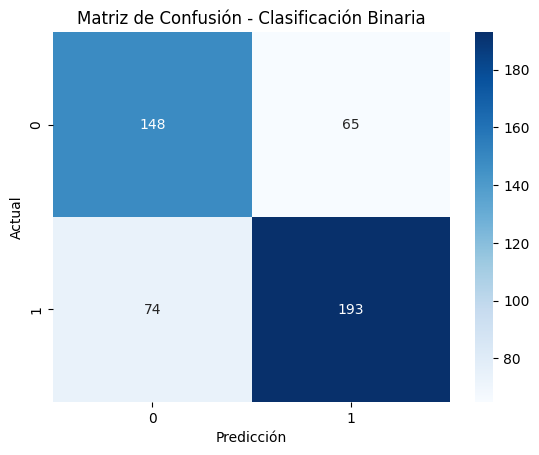

In [13]:
# Predicciones y métricas
y_pred = model.predict(X_test)

# Matriz de confusión y métricas
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Clasificación Binaria")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

# GridSearch para encontrar el mejor conjunto de hiperparámetros
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Mejores parámetros: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)

Matriz de Confusión (modelo optimizado):
 [[151  62]
 [ 71 196]]

Informe de Clasificación (modelo optimizado):
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       213
           1       0.76      0.73      0.75       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



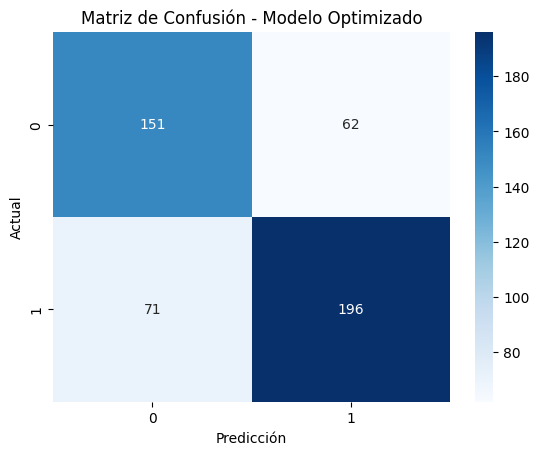

In [15]:
# Nuevas predicciones
y_pred_best = best_model.predict(X_test)

# Métricas y matriz de confusión
print("Matriz de Confusión (modelo optimizado):\n", confusion_matrix(y_test, y_pred_best))
print("\nInforme de Clasificación (modelo optimizado):\n", classification_report(y_test, y_pred_best))

# Matriz de confusión optimizada
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.show()
